In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass.Type.value_counts().sort_index()

,count
Type,
1,70
2,76
3,17
5,13
6,9
7,29


In [ ]:

glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

,count
household,
0,163
1,51


In [ ]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household


### Q1 . Try different thresholds for computing predictions using 'Al' column. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall.

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

# Define thresholds to try
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

# Evaluate different thresholds
for threshold in thresholds:
    # Convert probabilities to binary predictions using the threshold
    predictions = (probs >= threshold).astype(int)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)

    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Threshold: 0.30, Accuracy: 0.81, Precision: 0.79, Recall: 0.69
Threshold: 0.40, Accuracy: 0.74, Precision: 0.78, Recall: 0.44
Threshold: 0.50, Accuracy: 0.74, Precision: 0.86, Recall: 0.38
Threshold: 0.60, Accuracy: 0.74, Precision: 1.00, Recall: 0.31
Threshold: 0.70, Accuracy: 0.70, Precision: 1.00, Recall: 0.19


### Q2. Do the same analysis for other columns

In [ ]:
#elements
elements = ['RI','Na','Mg','Si','K','Ca','Ba','Fe']
for ele in elements:
    X= np.array(glass[ele]).reshape(-1,1)
    y = glass.household

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities
    probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

    # Define thresholds to try
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

    # Evaluate different thresholds
    for threshold in thresholds:
        # Convert probabilities to binary predictions using the threshold
        predictions = (probs >= threshold).astype(int)

        # Compute evaluation metrics
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        print(f"Element:{ele}, Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Element:RI, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Element:RI, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.60, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Na, Threshold: 0.30, Accuracy: 0.77, Precision: 0.71, Recall: 0.62
Element:Na, Threshold: 0.40, Accuracy: 0.81, Precision: 0.83, Recall: 0.62
Element:Na, Threshold: 0.50, Accuracy: 0.81, Precision: 0.90, Recall: 0.56
Element:Na, Threshold: 0.60, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element:Na, Threshold: 0.70, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element:Mg, Threshold: 0.30, Accuracy: 0.91, Precision: 0.88, Recall: 0.88
Element:Mg, Threshold: 0.40, Accuracy: 0.84, Precision: 0.85, Recall: 0.69
Element:Mg, Threshold: 0.50, Accuracy: 0.84, Precision: 0.85, Recall: 0.69
Element:Mg, Threshold: 0.60, Accuracy: 0.84, Precision: 0.85, Recall: 0.69
Element:Mg, Threshold: 0.70, Accuracy: 0.84, Precision: 0.85, Recall: 0.69
Element:Si, Threshold: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Element:K, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:K, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:K, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:K, Threshold: 0.60, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:K, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Element:Ca, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ca, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ca, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ca, Threshold: 0.60, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ca, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ba, Threshold: 0.30, Accuracy: 0.77, Precision: 0.88, Recall: 0.44
Element:Ba, Threshold: 0.40, Accuracy: 0.74, Precision: 0.86, Recall: 0.38
Element:Ba, Threshold: 0.50, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element:Ba, Threshold: 0.60, Accuracy: 0.70, Precision: 0.80, Recall: 0.25
Element:Ba, Threshold: 0.70, Accuracy: 0.70, Precision: 0.80, Recall: 0.25
Element:Fe, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Fe, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Fe, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Fe, Threshold: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

### Q3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding).

In [ ]:
# Drop the target variable from the features
X = glass.drop(columns=['Type', 'household'])

# Target variable
y = glass['household']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8837209302325582


In [ ]:

# Logistic Regression on other features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

features_to_test = ['Na', 'Mg', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = glass['household']

for col in features_to_test:
    feature_data = glass[[col]].values
    X_train, X_test, y_train, y_test = train_test_split(feature_data, target, test_size=0.2, random_state=1)

    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    probability_scores = classifier.predict_proba(X_test)[:, 1]

    print(f"\nEvaluating Feature: {col}")
    for t in [0.3, 0.4, 0.5, 0.6, 0.7]:
        preds = (probability_scores >= t).astype(int)
        acc = accuracy_score(y_test, preds)
        prec = precision_score(y_test, preds)
        rec = recall_score(y_test, preds)
        print(f"Threshold: {t:.1f} | Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}")



Evaluating Feature: Na
Threshold: 0.3 | Accuracy: 0.67, Precision: 0.28, Recall: 0.83
Threshold: 0.4 | Accuracy: 0.79, Precision: 0.38, Recall: 0.83
Threshold: 0.5 | Accuracy: 0.88, Precision: 0.56, Recall: 0.83
Threshold: 0.6 | Accuracy: 0.88, Precision: 0.60, Recall: 0.50
Threshold: 0.7 | Accuracy: 0.88, Precision: 0.67, Recall: 0.33

Evaluating Feature: Mg
Threshold: 0.3 | Accuracy: 0.84, Precision: 0.44, Recall: 0.67
Threshold: 0.4 | Accuracy: 0.84, Precision: 0.44, Recall: 0.67
Threshold: 0.5 | Accuracy: 0.81, Precision: 0.38, Recall: 0.50
Threshold: 0.6 | Accuracy: 0.84, Precision: 0.43, Recall: 0.50
Threshold: 0.7 | Accuracy: 0.86, Precision: 0.50, Recall: 0.50

Evaluating Feature: Si
Threshold: 0.3 | Accuracy: 0.88, Precision: 0.67, Recall: 0.33
Threshold: 0.4 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.5 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.6 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.7 | Accuracy: 0.86, Precision: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Threshold: 0.5 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.6 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Threshold: 0.7 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00

Evaluating Feature: Ca
Threshold: 0.3 | Accuracy: 0.77, Precision: 0.17, Recall: 0.17
Threshold: 0.4 | Accuracy: 0.84, Precision: 0.00, Recall: 0.00
Threshold: 0.5 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.6 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.7 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluating Feature: Ba
Threshold: 0.3 | Accuracy: 0.88, Precision: 0.60, Recall: 0.50
Threshold: 0.4 | Accuracy: 0.88, Precision: 0.60, Recall: 0.50
Threshold: 0.5 | Accuracy: 0.88, Precision: 0.60, Recall: 0.50
Threshold: 0.6 | Accuracy: 0.88, Precision: 0.60, Recall: 0.50
Threshold: 0.7 | Accuracy: 0.86, Precision: 0.50, Recall: 0.17

Evaluating Feature: Fe
Threshold: 0.3 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.4 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.5 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.6 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.7 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

In [ ]:

# Logistic Regression on all features with preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

features_all = glass.drop(columns=['Type', 'household'])
labels = glass['household']

num_columns = features_all.select_dtypes(include=['float64', 'int64']).columns.tolist()

transformer = ColumnTransformer([
    ('scale_numeric', StandardScaler(), num_columns)
])

pipeline_model = Pipeline([
    ('prep', transformer),
    ('logistic', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(features_all, labels, test_size=0.2, random_state=1)
pipeline_model.fit(X_train, y_train)

# Predict probabilities
predicted_probs = pipeline_model.predict_proba(X_test)[:, 1]


Q4. ROC Curve

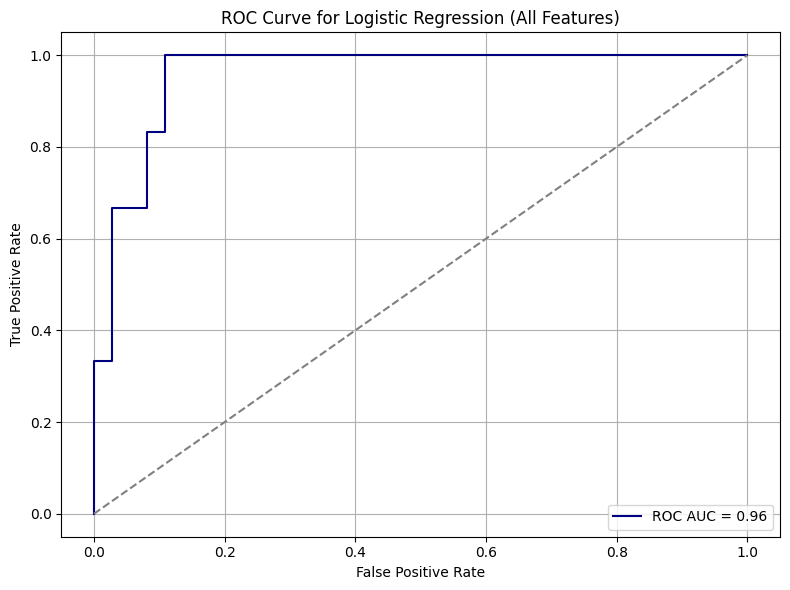

In [ ]:

# ROC Curve Plot
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, predicted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curve for Logistic Regression (All Features)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
